In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization

### Načteme data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Připravíme data

In [4]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test / 255.

In [5]:
import numpy as np 

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

### Vytvoříme model

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.2,  
        width_shift_range=0.1, 
        height_shift_range=0.1 )

In [8]:
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=64), 
    epochs = 15, 
    steps_per_epoch = X_train.shape[0]//64,
    validation_data = (X_valid, y_valid), 
    callbacks=[keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)]
)

Epoch 1/15
859/859 [==============================] - 63s 37ms/step - loss: 0.4266 - accuracy: 0.8706 - val_loss: 0.0641 - val_accuracy: 0.9802
Epoch 2/15
859/859 [==============================] - 32s 38ms/step - loss: 0.1321 - accuracy: 0.9605 - val_loss: 0.0582 - val_accuracy: 0.9832
Epoch 3/15
859/859 [==============================] - 32s 37ms/step - loss: 0.1017 - accuracy: 0.9694 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 4/15
859/859 [==============================] - 32s 37ms/step - loss: 0.0841 - accuracy: 0.9752 - val_loss: 0.0291 - val_accuracy: 0.9922
Epoch 5/15
859/859 [==============================] - 32s 37ms/step - loss: 0.0769 - accuracy: 0.9770 - val_loss: 0.0236 - val_accuracy: 0.9910
Epoch 6/15
859/859 [==============================] - 32s 38ms/step - loss: 0.0679 - accuracy: 0.9801 - val_loss: 0.0208 - val_accuracy: 0.9932
Epoch 7/15
859/859 [==============================] - 32s 37ms/step - loss: 0.0620 - accuracy: 0.9817 - val_loss: 0.0238 - val_accuracy:

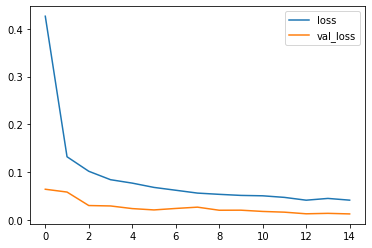

In [9]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

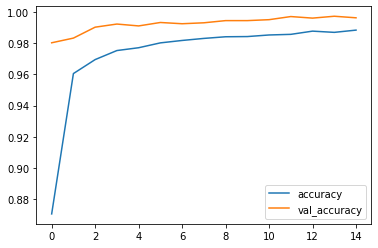

In [10]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

### Vyzkoušíme na testovacích datech

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0144 - accuracy: 0.9956


[0.014439239166676998, 0.9955999851226807]